<a href="https://colab.research.google.com/github/TisSeferi/proj1_hci/blob/main/proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import mnist
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
first_filter = 8
second_filter = 16
third_filter = 32
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(first_filter, filter_size, input_shape=(28, 28, 1), padding="same", activation='relu'),
  MaxPooling2D(pool_size=pool_size),
  #Dropout(0.25),
  Conv2D(second_filter, filter_size, padding="same", activation='relu'),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(third_filter, filter_size, padding="same", activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  #Dropout(0.5),
  Dense(10, activation='softmax'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

In [6]:
model.fit(
  train_images,
  train_labels,
  epochs=5,
  validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8628 - loss: 0.4317 - val_accuracy: 0.9852 - val_loss: 0.0553
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9833 - val_loss: 0.0542
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9868 - val_loss: 0.0418
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0306 - val_accuracy: 0.9895 - val_loss: 0.0357
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0248 - val_accuracy: 0.9903 - val_loss: 0.0307


In [10]:
print(model.history.history.keys())
# ['loss', 'accuracy', 'val_loss', 'val_accuracy']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [12]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

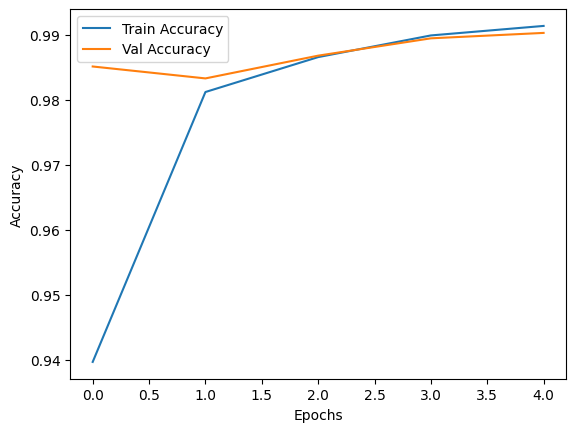

In [13]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9891 - loss: 0.0343
Test accuracy: 0.9890999794006348


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,864 (1.22 MB)

 Trainable params: 106,954 (417.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 213,910 (835.59 KB)